In [226]:
import pandas as pd
import glob
import os
import numpy as np
import unidecode
import plotly.express as px

In [246]:
# https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262#consulter

path_insee = './insee.fr/dpt_2000_2021_csv/'
all_files = glob.glob(os.path.join(path_insee, "*.csv"))
df_ip = pd.concat((pd.read_csv(f, sep=';') for f in all_files), ignore_index=True)
df_ip

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,2000,54,78
1,1,_PRENOMS_RARES,2001,54,77
2,1,_PRENOMS_RARES,2002,54,103
3,1,_PRENOMS_RARES,2003,54,113
4,1,_PRENOMS_RARES,2004,54,91
...,...,...,...,...,...
1166967,2,ZOÉ,2016,32,4
1166968,2,ZOÉ,2017,32,3
1166969,2,ZOÉ,2018,32,3
1166970,2,ZOÉ,2019,32,3


In [247]:
df_ip.columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre']
df_ip['prenom'] = df['prenom'].apply(lambda name: unidecode.unidecode(str(name)).upper())
df_ip

,sexe,prenom,annee,dpt,nombre
0,1,NaN,2000,54,78
1,1,NaN,2001,54,77
2,1,NaN,2002,54,103
3,1,NaN,2003,54,113
4,1,NaN,2004,54,91
...,...,...,...,...,...
1166967,2,ZOE,2016,32,4
1166968,2,ZOE,2017,32,3
1166969,2,ZOE,2018,32,3
1166970,2,ZOE,2019,32,3


In [248]:
df_ip2 = df_ip.query("dpt != 'XX' & prenom != '_PRENOMS_RARES' & annee != 'XXXX'").dropna().reset_index(drop=True)
df_ip2

,sexe,prenom,annee,dpt,nombre
0,1,AARON,2004,54,3
1,1,AARON,2006,54,7
2,1,AARON,2007,54,10
3,1,AARON,2008,54,21
4,1,AARON,2009,54,18
...,...,...,...,...,...
1124118,2,ZOE,2016,32,4
1124119,2,ZOE,2017,32,3
1124120,2,ZOE,2018,32,3
1124121,2,ZOE,2019,32,3


In [250]:
# df = df.groupby(['sexe', 'prenom', 'annee', 'dpt']).agg(nombre = ("nombre", sum)).reset_index().sort_values('prenom')
df_ip3 = df_ip2.groupby(['sexe', 'prenom', 'dpt']).agg(nombre = ("nombre", sum)).reset_index()

In [251]:
df_ip4 = df_ip3.query("dpt==64 & sexe==1").sort_values('nombre', ascending=False, ignore_index=True)
#df_ip4.to_csv(path_insee+'../../Naissance_Boy_64_2000-2021.csv', sep=';')
df_ip4

,sexe,prenom,dpt,nombre
0,1,LUCAS,64,1430
1,1,HUGO,64,1210
2,1,THEO,64,1100
3,1,THOMAS,64,1089
4,1,ENZO,64,1073
...,...,...,...,...
670,1,LOWEN,64,3
671,1,LUKE,64,3
672,1,LYLIAN,64,3
673,1,MACEO,64,3


In [252]:
df_ip5=df_ip3.query("dpt==64 & sexe==2").sort_values('nombre', ascending=False, ignore_index=True)
#df_ip5.to_csv(path_insee+'../../Naissance_Girl_64_2000-2021.csv', sep=';')
df_ip5

,sexe,prenom,dpt,nombre
0,2,EMMA,64,1466
1,2,LEA,64,1166
2,2,MANON,64,1158
3,2,CHLOE,64,1107
4,2,INES,64,958
...,...,...,...,...
739,2,PHILOMENE,64,3
740,2,LAURENE,64,3
741,2,PRUNE,64,3
742,2,QUITTERIE,64,3


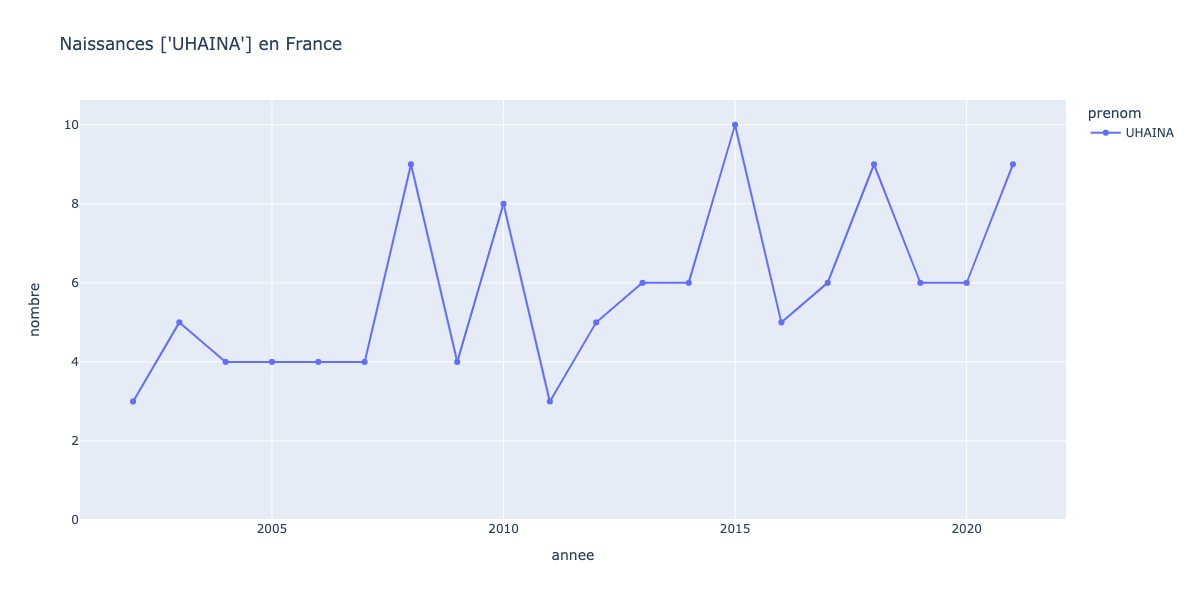

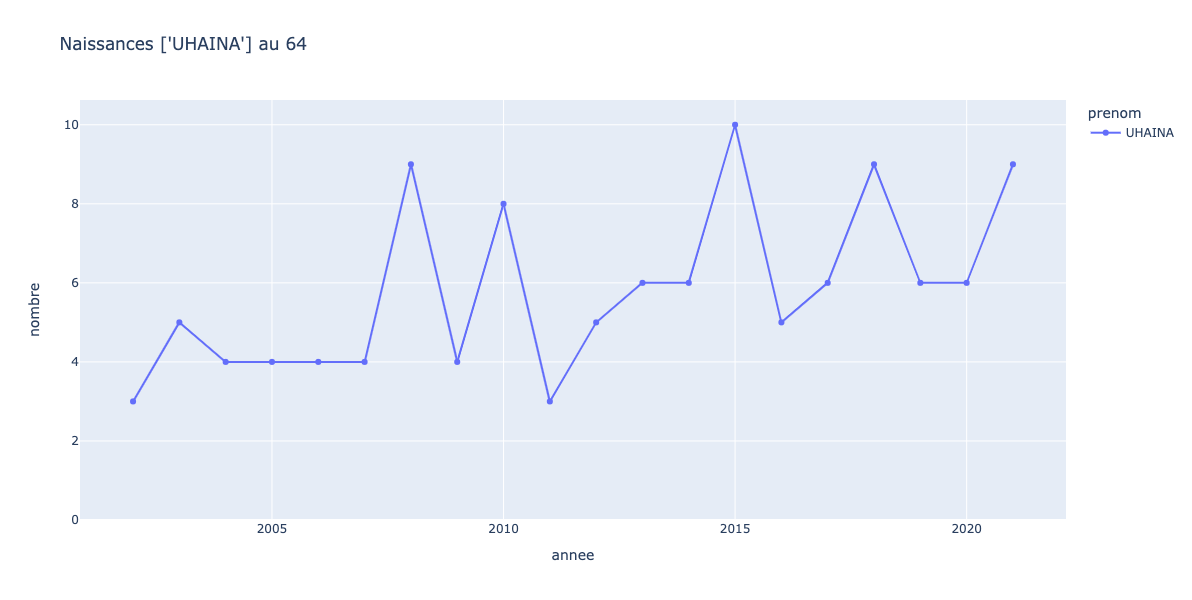

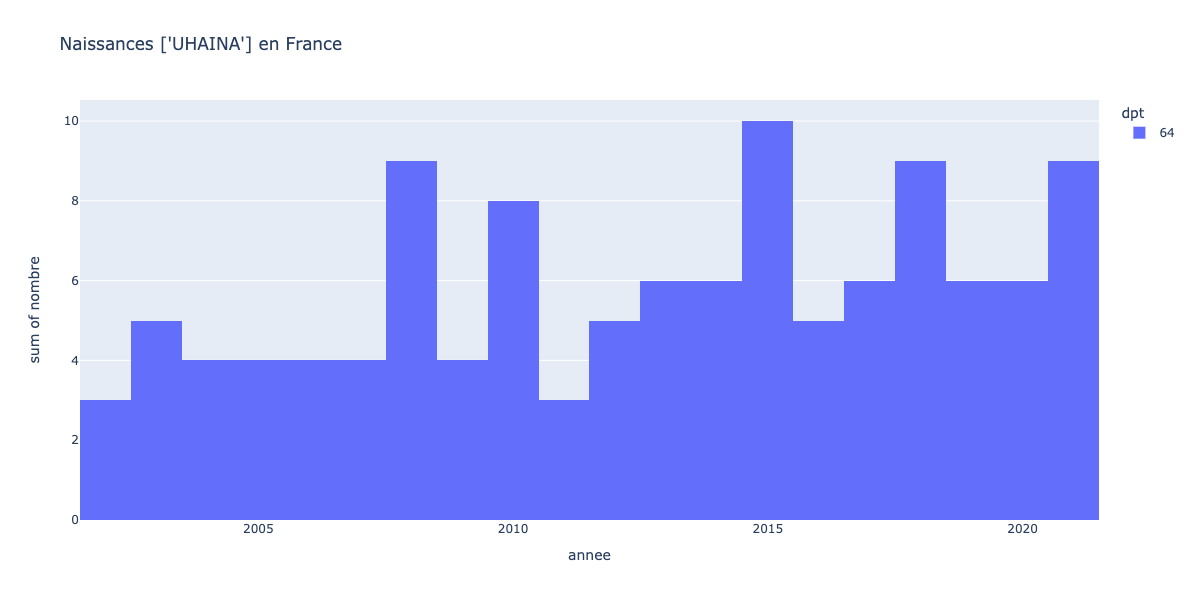

In [387]:
names = ['UHAINA']
#names = ['UNAI', 'ESTEBAN', 'EKAIN', 'ANAE', 'LUNA', 'KATERINA', 'LAIDA']

df_ipselect2 = df_ip2.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.line(df_ipselect2, x="annee", y="nombre", title=f'Naissances {names} en France', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()

df_ipselect3 = df_ip2.query("prenom in @names & dpt == 64").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.line(df_ipselect3, x="annee", y="nombre", title=f'Naissances {names} au 64', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()

df_ipselect1 = df_ip2.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee','dpt']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.histogram(df_ipselect1, x="annee", y="nombre", title=f'Naissances {names} en France', nbins=22, color='dpt', height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()
#fig.update_yaxes(rangemode="tozero")


In [395]:
# https://www.ine.es/tnombres/formGeneralresult.do

path_ine = './ine.es/'

dpt_list = [('araba', 'ARA'), ('bizkaia', 'BIZ'), ('gipuzkoa','GIP'), ('nafarroa','NAF')]
annee_list = [2000, 2010, 2020]
sexe_list = [('mutiko', 1), ('neska', 2)]

df_he = pd.DataFrame(columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre'])
for (dpt, dpt_code) in dpt_list:
    for annee in annee_list:
        for (sexe, sexe_code) in sexe_list:
            file = path_ine + dpt + '_' + str(annee) + '_' + sexe + '.csv'
            dfile = pd.read_csv(file, sep=';')
            dfile_new = pd.DataFrame(columns=['sexe', 'prenom', 'annee', 'dpt', 'nombre'])
            dfile_new.prenom = dfile.Nombre
            dfile_new.nombre = dfile.Total
            dfile_new.sexe = sexe_code
            dfile_new.annee = annee
            dfile_new.dpt = dpt_code
            df_he = df_he.append(dfile_new, ignore_index=True)
df_he

,sexe,prenom,annee,dpt,nombre
0,1,IKER,2000,ARA,512
1,1,UNAI,2000,ARA,442
2,1,MIKEL,2000,ARA,441
3,1,JON,2000,ARA,380
4,1,ANDER,2000,ARA,379
...,...,...,...,...,...
7887,2,NATALIA,2020,NAF,5
7888,2,OIHANE,2020,NAF,5
7889,2,RIM,2020,NAF,5
7890,2,SALMA,2020,NAF,5


In [396]:
df_he2 = df_he
df_he2.nombre = df_he2.nombre.str.replace('\xa0', '')
df_he2.nombre = df_he2.nombre.str.replace('.', '')
df_he2 = df_he2.dropna()
df_he2['nombre'] = df_he2['nombre'].astype(int)
df_he2 = df_he2.reset_index(drop=True)
df_he2['prenom'] = df_he2['prenom'].apply(lambda name: unidecode.unidecode(str(name)).upper())
df_he2

<ipython-input-396-b9cbab6e2f30>:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-396-b9cbab6e2f30>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sexe,prenom,annee,dpt,nombre
0,1,IKER,2000,ARA,512
1,1,UNAI,2000,ARA,442
2,1,MIKEL,2000,ARA,441
3,1,JON,2000,ARA,380
4,1,ANDER,2000,ARA,379
...,...,...,...,...,...
7879,2,NATALIA,2020,NAF,5
7880,2,OIHANE,2020,NAF,5
7881,2,RIM,2020,NAF,5
7882,2,SALMA,2020,NAF,5


In [397]:
df_he3 = df_he2.groupby(by=['sexe', 'prenom']).sum().reset_index()
df_he3

,sexe,prenom,nombre
0,1,AARON,528
1,1,ABDELKADER,6
2,1,ABDELLAH,13
3,1,ABDERRAHMAN,14
4,1,ABDOULAYE,7
...,...,...,...
1763,2,ZORIONE,5
1764,2,ZUBEROA,29
1765,2,ZUHARA,27
1766,2,ZURIA,5


In [398]:
df_he4 = df_he3.query("sexe==1").sort_values('nombre', ascending=False, ignore_index=True)
df_he4

,sexe,prenom,nombre
0,1,IKER,7207
1,1,JON,6726
2,1,UNAI,6162
3,1,MIKEL,6065
4,1,ANDER,5984
...,...,...,...
787,1,FIRAS,5
788,1,FRAN,5
789,1,SANTI,5
790,1,JESUS ANGEL,5


In [399]:
#df_he4.to_csv(path_ine+'../Naissance_Boy_Hegoalde_2000-2021.csv', sep=';')

In [400]:
df_he5 = df_he3.query("sexe==2").sort_values('nombre', ascending=False, ignore_index=True)
df_he5

,sexe,prenom,nombre
0,2,ANE,6910
1,2,IRATI,5621
2,2,JUNE,4794
3,2,NAHIA,4727
4,2,LUCIA,4198
...,...,...,...
971,2,ARALE,5
972,2,MARIA FERNANDA,5
973,2,ANTONIA,5
974,2,SABELA,5


In [401]:
#df_heg5.to_csv(path_ine+'../Naissance_Girl_Hegoalde_2000-2021.csv', sep=';')

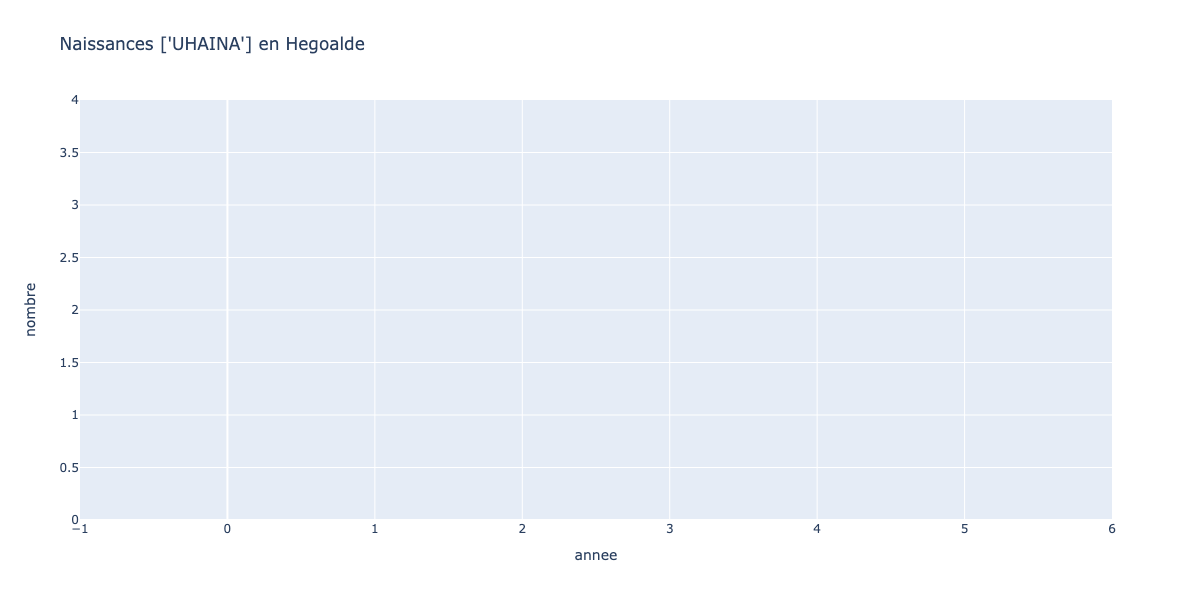

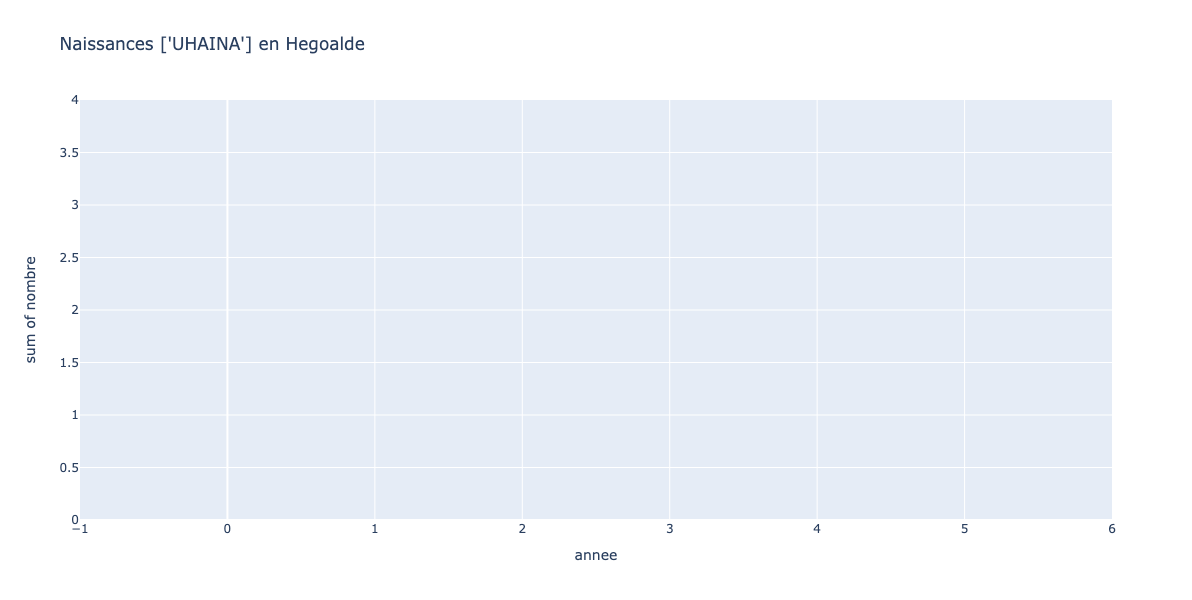

In [403]:
names = ['UHAINA']
#names = ['UNAI', 'ESTEBAN', 'EKAIN', 'ANAE', 'LUNA', 'KATERINA', 'LAIDA']

df_heselect2 = df_he2.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.line(df_heselect2, x="annee", y="nombre", title=f'Naissances {names} en Hegoalde', color='prenom', markers=True, height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()

df_heselect1 = df_he2.query("prenom in @names").groupby(by=['sexe', 'prenom', 'annee','dpt']).agg(nombre = ("nombre", sum)).reset_index()
fig=px.histogram(df_heselect1, x="annee", y="nombre", title=f'Naissances {names} en Hegoalde', nbins=3, color='dpt', height=600)
fig.update_yaxes(rangemode="tozero")
fig.show()
#fig.update_yaxes(rangemode="tozero")


In [362]:
df_ip6 = df_ip2.query("dpt==64").groupby(['sexe', 'prenom', 'dpt']).agg(nombre = ("nombre", sum)).reset_index()
df_he6 = df_he2.groupby(['sexe', 'prenom','dpt']).agg(nombre = ("nombre", sum)).reset_index()
df_loc = df_ip6
df_loc = df_loc.append(df_he6, ignore_index=True)
df_loc.sort_values('nombre', ascending=False, ignore_index=True)

,sexe,prenom,dpt,nombre
0,1,JON,BIZ,3240
1,2,ANE,BIZ,3079
2,1,IKER,BIZ,2985
3,1,ANDER,BIZ,2805
4,1,MARKEL,BIZ,2667
...,...,...,...,...
5896,1,KAMIL,64,3
5897,1,STAN,64,3
5898,2,MARITXU,64,3
5899,2,MARJOLAINE,64,3


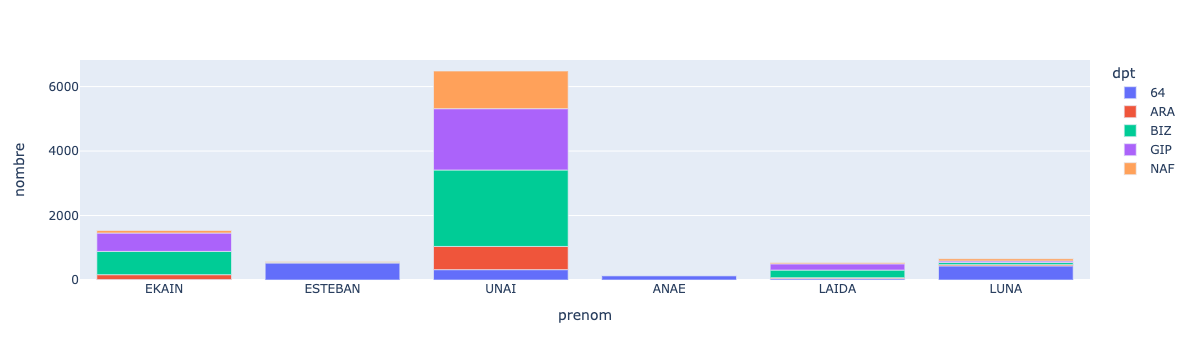

In [363]:
names = ['EKAIN','UNAI']
names = ['UNAI', 'ESTEBAN', 'EKAIN', 'ANAE', 'LUNA', 'KATERINA', 'LAIDA']

#px.pie(df_loc.query('prenom in @names'), values='nombre', names='dpt')
px.bar(df_loc.query('prenom in @names'), x='prenom', y='nombre', color='dpt')

In [388]:
df_loc[df_loc.prenom.str.contains("GO")].groupby(by=['sexe', 'prenom']).agg(nombre = ('nombre', sum)).sort_values('prenom').reset_index()

,sexe,prenom,nombre
0,2,AMAGOIA,32
1,1,ARGOITZ,13
2,2,BEGOÑA,148
3,1,DIEGO,2087
4,1,DIOGO,3
5,1,EGOI,211
6,1,EGOITZ,662
7,1,EGOR,5
8,1,GOAR,6
9,2,GOIATZ,72


In [390]:
p='IÑIGO'
unidecode.unidecode(str(p)).upper()

'INIGO'